### Time series analysis and forecasting

PERRIN FRERES SA is a company based out of Switzerland. Website: http://perrin-freres.ch. Employees at PERRIN FRERES SA.

the dataset contains two columns. The dataset is monthly sales of champagne from year 1964 to 1972.

1. month: contains the month and years of the date.
2. Perrin Freres monthly champagne sales million

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.arima import auto_arima
# testing for stationary
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.varmax import VARMAX
%matplotlib inline

In [2]:
df=pd.read_csv('Perrin freres.csv')
df.head()

,Month,Perrin Freres monthly champagne sales million
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Month                                          105 non-null    datetime64[ns]
 1   Perrin Freres monthly champagne sales million  105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [4]:
df.describe()

,Perrin Freres monthly champagne sales million
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [5]:
df=df.set_index(df['Month'])
df.drop('Month',axis=1,inplace=True)
df.head()

,Perrin Freres monthly champagne sales million
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


here to view the sales

<AxesSubplot:xlabel='Month'>

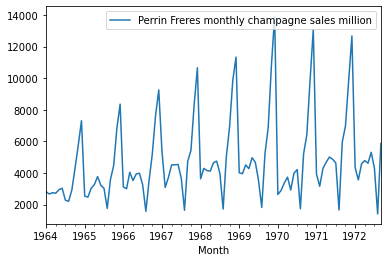

In [6]:
df.plot()

here to visualize the sales for each year separetely

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


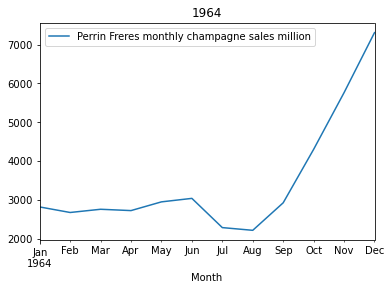

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


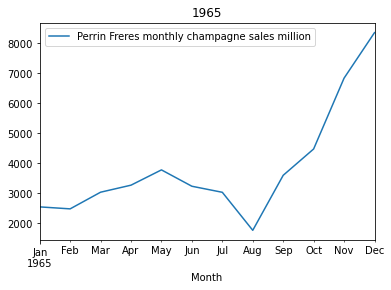

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


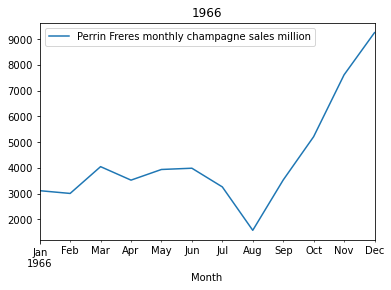

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


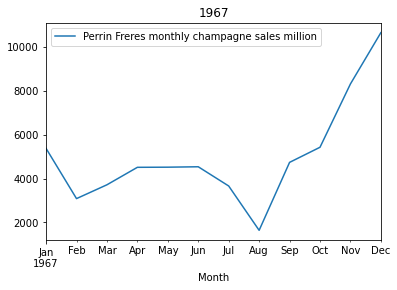

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


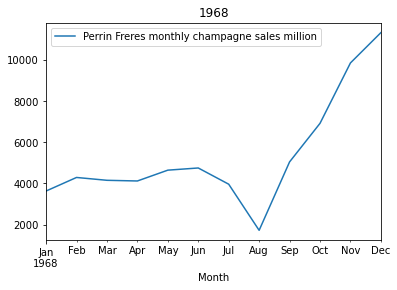

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


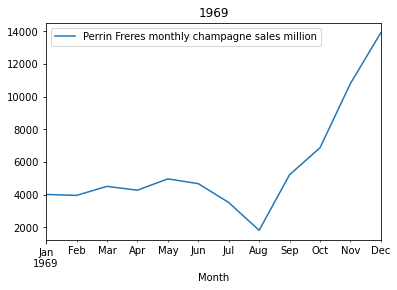

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


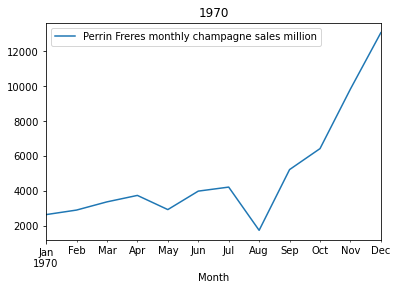

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/358404242.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['{}'.format(i)].plot()


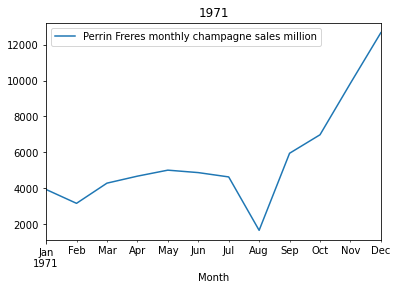

In [8]:
for i in range(1964,1972):
    df['{}'.format(i)].plot()
    plt.title(i)
    plt.show()

In [9]:
# looking the average price for each year
df.resample('Y').mean()

,Perrin Freres monthly champagne sales million
Month,
1964-12-31,3478.166667
1965-12-31,3864.166667
1966-12-31,4337.666667
1967-12-31,5016.000000
1968-12-31,5370.583333
1969-12-31,5713.416667
1970-12-31,5006.583333
1971-12-31,5640.583333
1972-12-31,4310.555556


In [10]:
df.resample('Y').sum()

,Perrin Freres monthly champagne sales million
Month,
1964-12-31,41738
1965-12-31,46370
1966-12-31,52052
1967-12-31,60192
1968-12-31,64447
1969-12-31,68561
1970-12-31,60079
1971-12-31,67687
1972-12-31,38795


<AxesSubplot:xlabel='Month'>

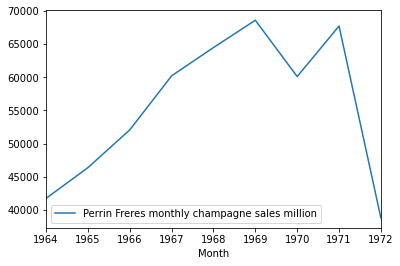

In [11]:
df.resample('Y').sum().plot()

observation:
1. on 1969 and 1971 the toal sales was reached the maximum (almost 65000)
2. on 1964 and 1972 the total sales was reached the minimum (<45000)
3. from 1964 to 1969 the total sales was increasing. but from 1969 to 1970 (slightly decreasing) and from 1971 to 1972 (highly decreasing)

to  know the difference  year to year

In [15]:
sum_month=df.resample('Y').sum()
sum_month['difference from previous']=sum_month['Perrin Freres monthly champagne sales million']-sum_month['Perrin Freres monthly champagne sales million'].shift(1)
sum_month

,Perrin Freres monthly champagne sales million,difference from previous
Month,,
1964-12-31,41738,NaN
1965-12-31,46370,4632.0
1966-12-31,52052,5682.0
1967-12-31,60192,8140.0
1968-12-31,64447,4255.0
1969-12-31,68561,4114.0
1970-12-31,60079,-8482.0
1971-12-31,67687,7608.0
1972-12-31,38795,-28892.0


<AxesSubplot:xlabel='Month'>

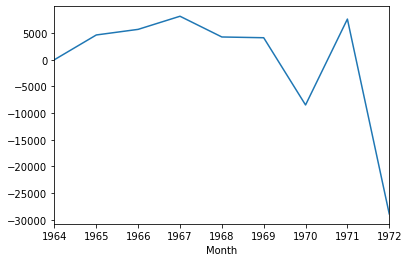

In [16]:
sum_month.fillna(0,inplace=True)
sum_month['difference from previous'].plot()

observation:
1. the high difference occured is from 1971 to 1972 (28000)

In [17]:
df['1964'].rolling(1).mean()

C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/2328079896.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1964'].rolling(1).mean()


,Perrin Freres monthly champagne sales million
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
1964-06-01,3036.0
1964-07-01,2282.0
1964-08-01,2212.0
1964-09-01,2922.0


C:\Users\KIIT\AppData\Local\Temp/ipykernel_62584/1693039366.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(df.index, model='additive',freq=12, extrapolate_trend = 12)


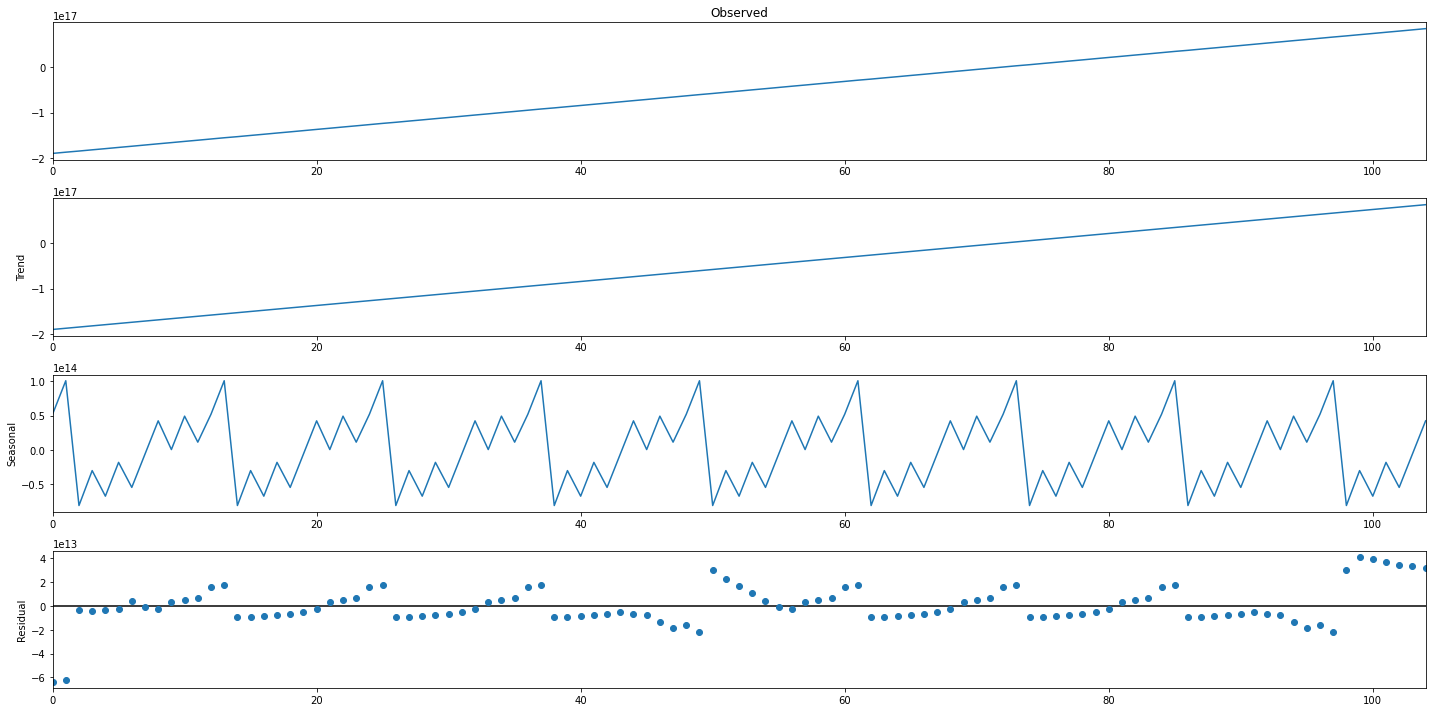

In [18]:
# decomposing time series component
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(df.index, model='additive',freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

In [19]:
# check stationary
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [20]:
adfuller_test(df['Perrin Freres monthly champagne sales million'])

ADF Test Statistic : -1.8335930563276204
p-value : 0.3639157716602462
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
# based on the Adfuller test the time series is not at stationary, so we have to change to stationary. 
#by using transformation or differencing method

In [22]:
df['dif']=df['Perrin Freres monthly champagne sales million'].shift(1)
df.fillna(0,inplace=True)

In [23]:
adfuller_test(df['dif'])

ADF Test Statistic : -2.913905315760857
p-value : 0.04375472888743722
#Lags Used : 11
Number of Observations Used : 93
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [24]:
# now it is stationary, so we can make forecast

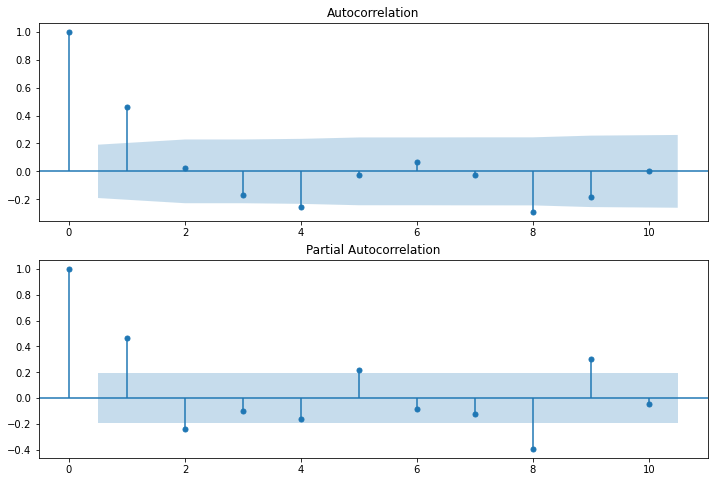

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Perrin Freres monthly champagne sales million'],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Perrin Freres monthly champagne sales million'],lags=10,ax=ax2)

In [26]:
# optimize p,d,q value
s=auto_arima(df['Perrin Freres monthly champagne sales million'],trace=True,suppress_warnings=True)
s.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.416 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Mon, 04 Jul 2022   AIC                           1935.750
Time:                        09:13:16   BIC                           1938.394
Sample:                             0   HQIC                          1936.821
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.895e+06   5.29e+05     13.025      0.000    5.86e+06    7.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
df.drop('dif',axis=1,inplace=True)

In [28]:
# train test split
X = df
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [29]:
df['Perrin Freres monthly champagne sales million']=df['Perrin Freres monthly champagne sales million'].astype('float32')

#### SARIMAX

SARIMAX is a seasonal equivalent model like SARIMA and Auto ARIMA. it can also deal with external effects. This feature of the model differs from other models.

In [31]:
model=sm.tsa.statespace.SARIMAX(train['Perrin Freres monthly champagne sales million'],order=(0, 1, 0),seasonal_order=(0,1,0,12))
results=model.fit()

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)

Month
1969-11-01     9808.0
1969-12-01    11281.0
1970-01-01     3966.0
1970-02-01     3907.0
1970-03-01     4460.0
1970-04-01     4226.0
1970-05-01     4918.0
1970-06-01     4627.0
1970-07-01     3473.0
1970-08-01     1771.0
1970-09-01     5172.0
1970-10-01     6822.0
1970-11-01     9758.0
1970-12-01    11231.0
1971-01-01     3916.0
1971-02-01     3857.0
1971-03-01     4410.0
1971-04-01     4176.0
1971-05-01     4868.0
1971-06-01     4577.0
1971-07-01     3423.0
1971-08-01     1721.0
1971-09-01     5122.0
1971-10-01     6772.0
1971-11-01     9708.0
1971-12-01    11181.0
1972-01-01     3866.0
1972-02-01     3807.0
1972-03-01     4360.0
1972-04-01     4126.0
1972-05-01     4818.0
1972-06-01     4527.0
1972-07-01     3373.0
1972-08-01     1671.0
1972-09-01     5072.0
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Month'>

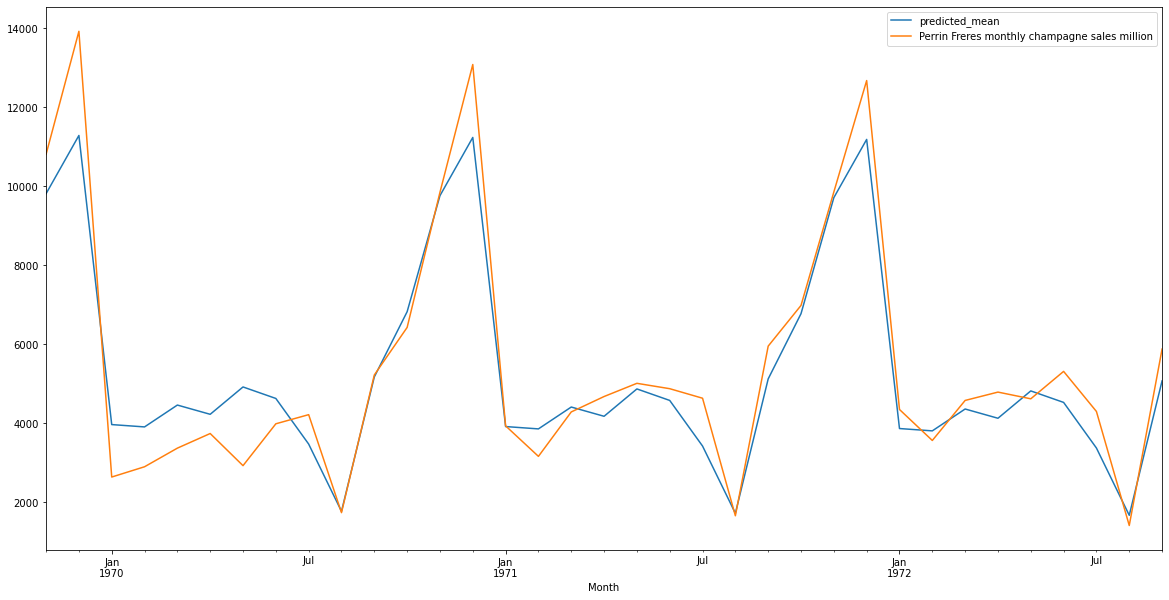

In [33]:
pred.plot(legend=True)
test['Perrin Freres monthly champagne sales million'].plot(legend=True)


metrices:
to check the accuracy of the model.

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Perrin Freres monthly champagne sales million']))
print(rmse)

909.2020206124238


In [35]:
test.mean()

Perrin Freres monthly champagne sales million    5465.142857
dtype: float64

In [36]:
pred.mean()

5279.171428571429

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Month'>

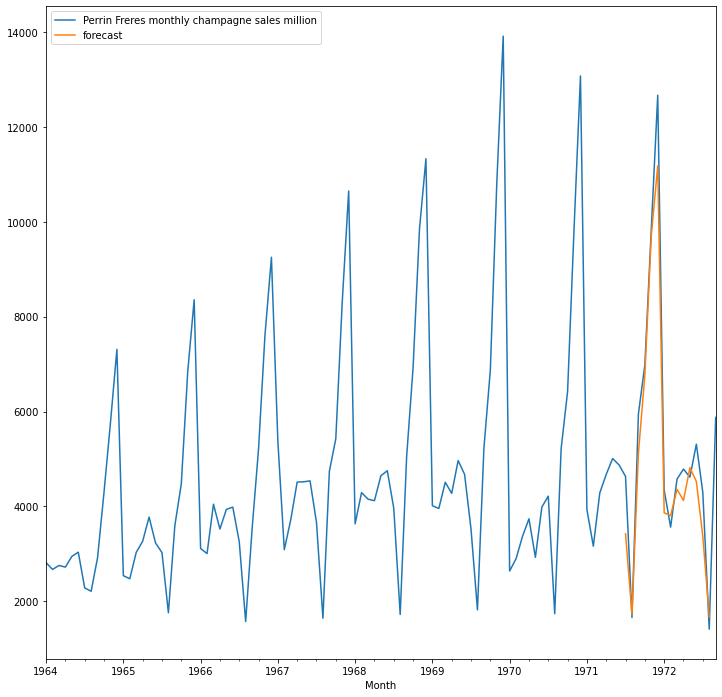

In [37]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Perrin Freres monthly champagne sales million','forecast']].plot(figsize=(12,12))

In [38]:
# to forecast for the next 2 years
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

to forecast perrin ferris' sales for the next 2 years

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df['forecast']=results.predict(start='1973-01',end='1974-08')

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [40]:
future_datest_df

,Perrin Freres monthly champagne sales million,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,3816.0
1973-02-01,NaN,3757.0
1973-03-01,NaN,4310.0
1973-04-01,NaN,4076.0
1973-05-01,NaN,4768.0
1973-06-01,NaN,4477.0
1973-07-01,NaN,3323.0


In [41]:
future_df=pd.concat([df,future_datest_df])

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

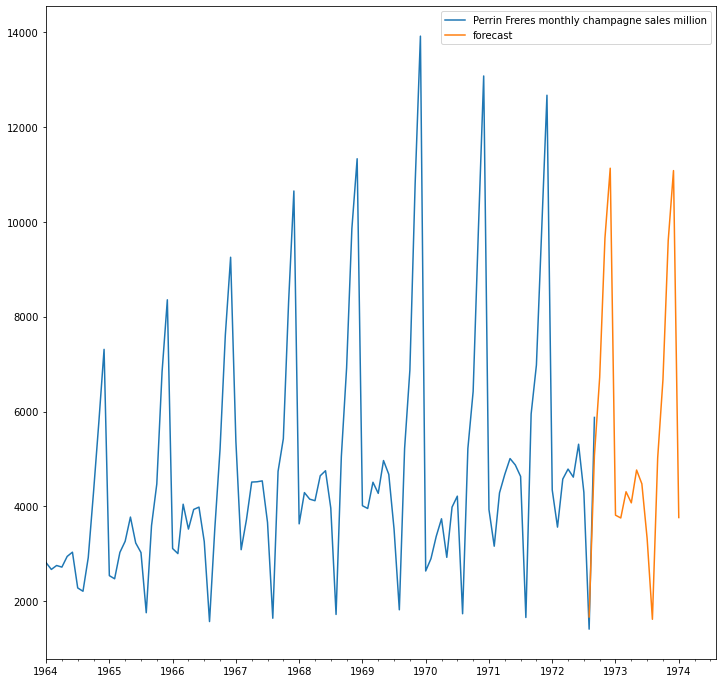

In [42]:
future_df['forecast'] = results.predict(start = 103, end = 120, dynamic= True)  
future_df[['Perrin Freres monthly champagne sales million', 'forecast']].plot(figsize=(12, 12)) 